# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cuencame de ceniceros
Processing Record 2 of Set 1 | ouellah
City not found. Skipping...
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | harstad
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | lembar
City not found. Skipping...
Processing Record 9 of Set 1 | kroya
Processing Record 10 of Set 1 | puerto colombia
Processing Record 11 of Set 1 | cabezon de la sal
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | abbadia san salvatore
Pr

In [4]:
url = 'https://api.openweathermap.org/data/2.5/weather?'
country=requests.get(f'{url}q={city}&appid={weather_api_key}').json()
country

{'coord': {'lon': 57.082, 'lat': 60.4078},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 283.12,
  'feels_like': 282.81,
  'temp_min': 283.12,
  'temp_max': 283.12,
  'pressure': 1016,
  'humidity': 95,
  'sea_level': 1016,
  'grnd_level': 995},
 'visibility': 10000,
 'wind': {'speed': 1.46, 'deg': 149, 'gust': 1.36},
 'clouds': {'all': 4},
 'dt': 1718055492,
 'sys': {'country': 'RU', 'sunrise': 1718059516, 'sunset': 1718127459},
 'timezone': 18000,
 'id': 542184,
 'name': 'Krasnovishersk',
 'cod': 200}

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cuencame de ceniceros,24.8711,-103.6964,34.25,15,75,5.98,MX,1718055375
1,west island,-12.1568,96.8225,25.99,89,100,9.77,CC,1718055375
2,iskateley,67.6803,53.1512,3.34,88,6,3.58,RU,1718055376
3,harstad,68.7990,16.5293,13.66,86,98,2.81,NO,1718055376
4,avarua,-21.2078,-159.7750,24.03,53,20,3.09,CK,1718055376


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cuencame de ceniceros,24.8711,-103.6964,34.25,15,75,5.98,MX,1718055375
1,west island,-12.1568,96.8225,25.99,89,100,9.77,CC,1718055375
2,iskateley,67.6803,53.1512,3.34,88,6,3.58,RU,1718055376
3,harstad,68.7990,16.5293,13.66,86,98,2.81,NO,1718055376
4,avarua,-21.2078,-159.7750,24.03,53,20,3.09,CK,1718055376


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

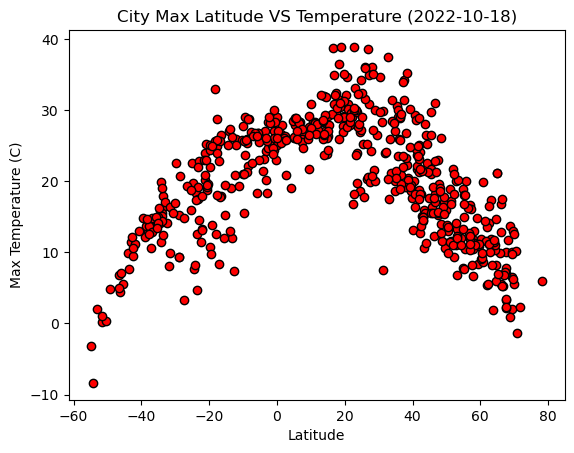

In [9]:
# Build scatter plot for latitude vs. temperature
x=city_data_df['Lat']
y=city_data_df['Max Temp']
plt.scatter(x,y, edgecolors='black',facecolors='red')
#plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black',facecolors='blue')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Max Latitude VS Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

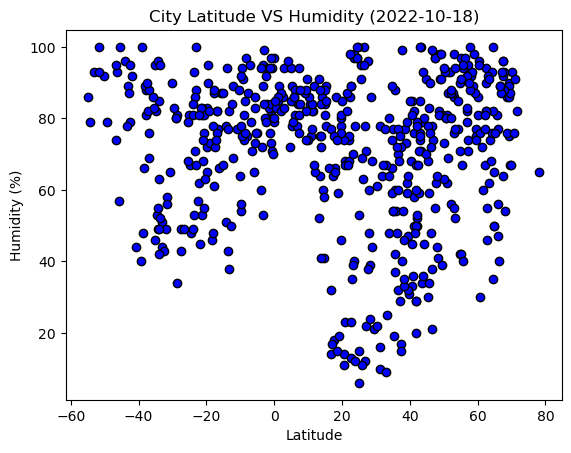

In [10]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df['Lat']
y=city_data_df['Humidity']
plt.scatter(x,y, edgecolors='black',facecolors='blue')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude VS Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

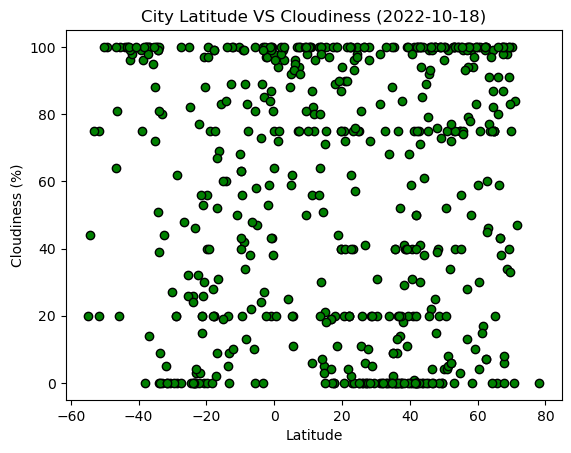

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df['Lat']
y=city_data_df['Cloudiness']
plt.scatter(x,y, edgecolors='black',facecolors='green')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude VS Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

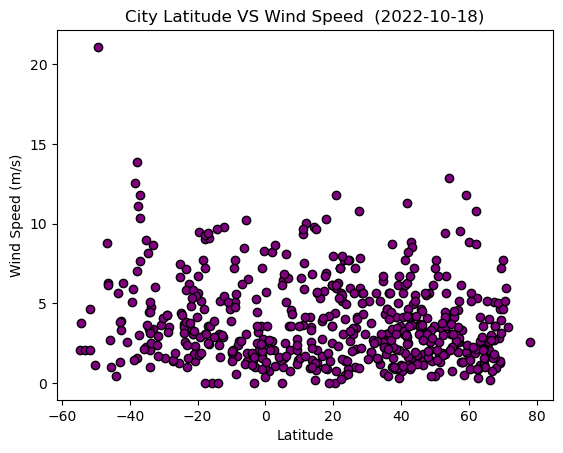

In [12]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df['Lat']
y=city_data_df['Wind Speed']
plt.scatter(x,y, edgecolors='black',facecolors='purple')
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title('City Latitude VS Wind Speed  (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# def create_linear_regression_plot(city_data_df, city_data):

#     value_plots = np.poly1d(np.polyfit(city_data_df[city_data[0]], city_data_df[city_data[1]], 1))

#     # Create a scatter plot of X and y
#     plt.scatter(city_data_df[city_data[0]], city_data_df[city_data[1]])

#     # Plot the linear regression line
#     plt.plot(city_data_df[city_data[0]], value_plots(city_data_df[city_data[0]]), color='red')

#     # Set the plot title and labels
#     plt.title('Linear Regression Plot')
#     plt.xlabel(city_data[0])
#     plt.ylabel(city_data[1])

#     # Display the plot
#     plt.show()

# YOUR CODE HERE
def create_linear_regression_plot(x_line,y_line,title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_line,y_line)
    regress_values = x_line * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    plt.scatter(x_line, y_line)
    plt.plot(x_line, regress_values, 'r', label=line_eq)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')

    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat'] >= 0]

# YOUR CODE HERE

# Display sample data
# northern_hemi_df.sort_values(by='City_ID', ascending=True)
# northern_hemi_df.sort_values(by='City')
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cuencame de ceniceros,24.8711,-103.6964,34.25,15,75,5.98,MX,1718055375
2,iskateley,67.6803,53.1512,3.34,88,6,3.58,RU,1718055376
3,harstad,68.7990,16.5293,13.66,86,98,2.81,NO,1718055376
5,ribeira grande,38.5167,-28.7000,20.43,77,40,4.12,PT,1718055376
7,puerto colombia,10.9878,-74.9547,28.05,75,100,3.62,CO,1718055377


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,25.99,89,100,9.77,CC,1718055375
4,avarua,-21.2078,-159.7750,24.03,53,20,3.09,CK,1718055376
6,kroya,-7.6331,109.2461,26.91,87,75,2.66,ID,1718055377
9,port-aux-francais,-49.3500,70.2167,4.88,79,100,21.10,TF,1718055377
11,bredasdorp,-34.5322,20.0403,14.15,53,100,2.22,ZA,1718055250


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6210455329068066


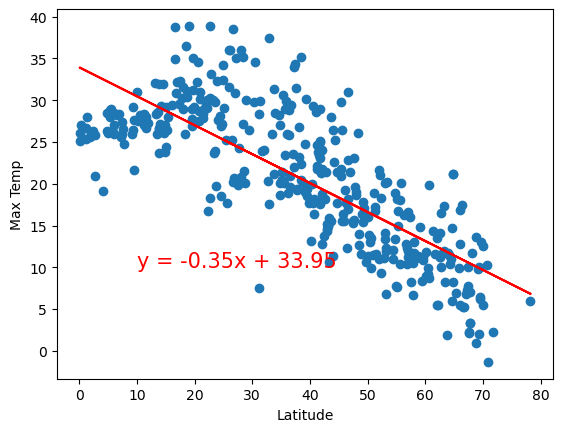

In [24]:
# Linear regression on Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Max Temp']
create_linear_regression_plot(x_line,y_line,'Max Temp',(10,10))
# YOUR CODE HERE

The r-value is: 0.6332493062726254


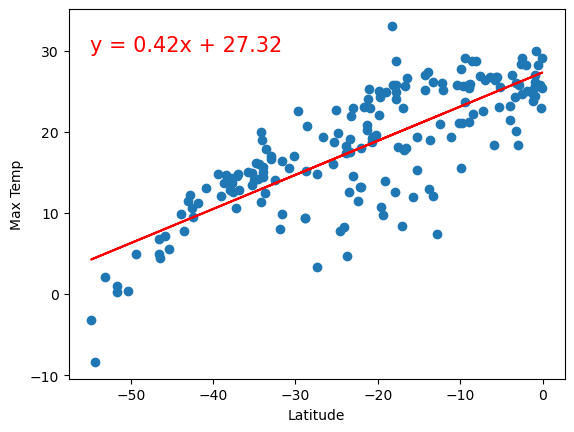

In [17]:
# Linear regression on Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Max Temp']
create_linear_regression_plot(x_line,y_line,'Max Temp',(-55,30))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00743410323348784


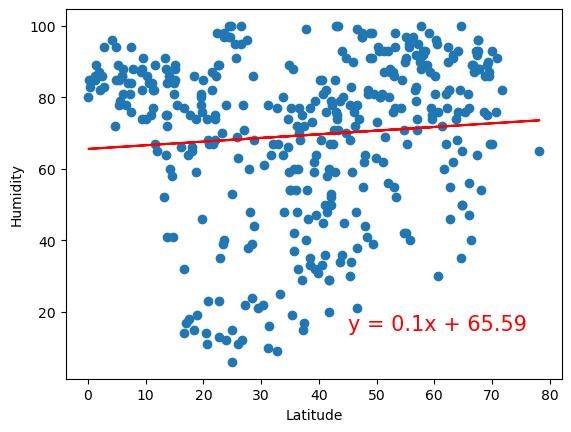

In [18]:
# Northern Hemisphere 
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Humidity']
create_linear_regression_plot(x_line,y_line,'Humidity',(45,15))
# YOUR CODE HERE

The r-value is: 0.0047224787005147525


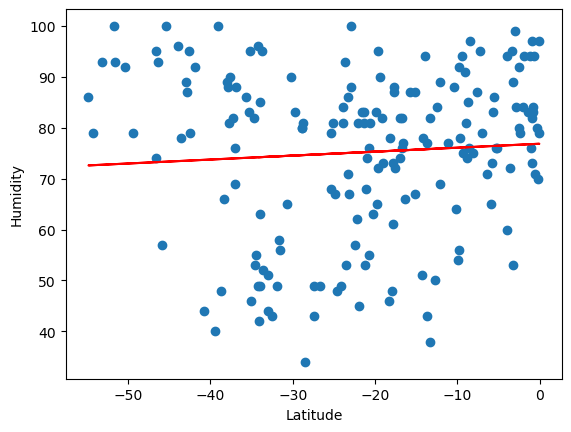

In [19]:
# Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Humidity']
create_linear_regression_plot(x_line,y_line,'Humidity',(-22,30))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 3.656326591729414e-05


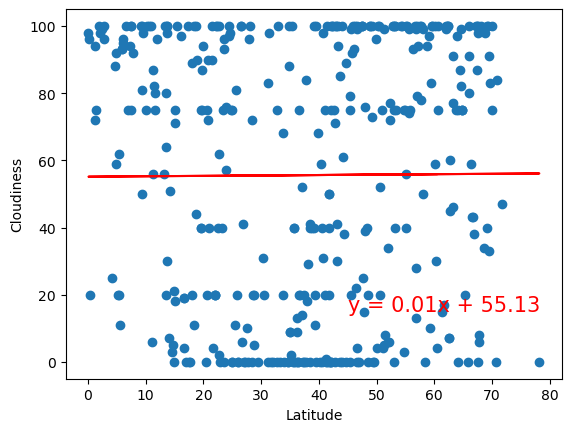

In [20]:
# Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Cloudiness']
create_linear_regression_plot(x_line,y_line,'Cloudiness',(45,15))
# YOUR CODE HERE

The r-value is: 0.005843921938990922


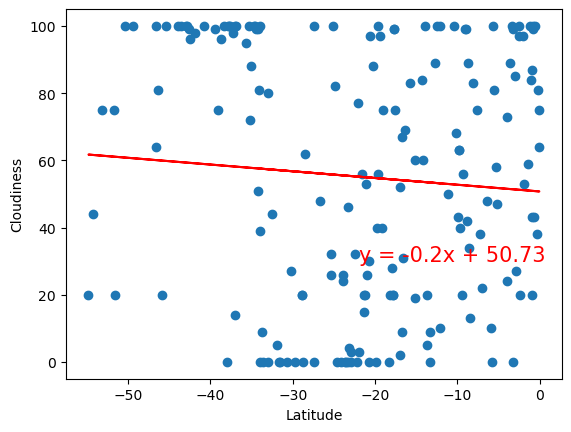

In [21]:
# Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Cloudiness']
create_linear_regression_plot(x_line,y_line,'Cloudiness',(-22,30))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010429083492164157


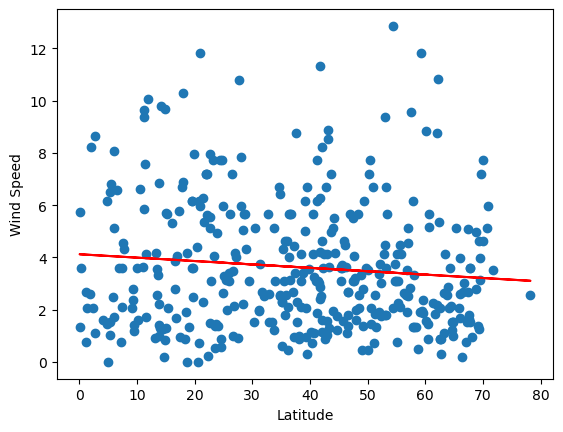

In [22]:
# Northern Hemisphere
x_line=northern_hemi_df['Lat']
y_line=northern_hemi_df['Wind Speed']
create_linear_regression_plot(x_line,y_line,'Wind Speed',(0,14))
# YOUR CODE HERE

The r-value is: 0.043880399455845855


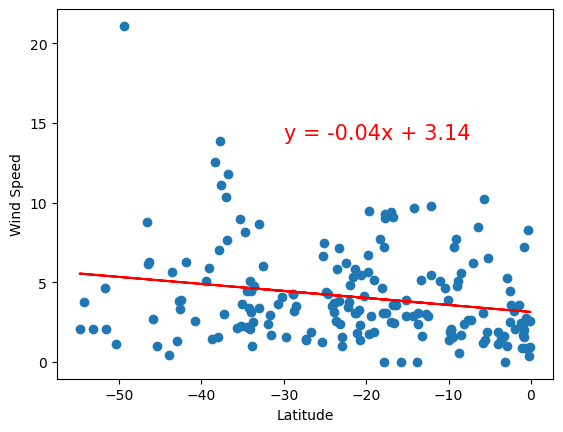

In [23]:
# Southern Hemisphere
x_line=southern_hemi_df['Lat']
y_line=southern_hemi_df['Wind Speed']
create_linear_regression_plot(x_line,y_line,'Wind Speed',(-30,14))
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE